# Data Science Assessment Task

This task involved opening a data file and performing any data science techiques to review the data.

### Initial thoughts
The task as is set out is around finding the data landscape of the given data and identifying how it relates to the *target* field.

### Planned methods:
- [x] Open data in Pandas
- [ ] Determine Data structure
    - [x] Find column types
    - [x] identify any abnormalities in the data
- [ ] Find missing Values
- [ ] Use data with just filled values
    - [ ] For more advanced methods, convert the Gender and Target fields both to boolean fields - making the data fully numeric (should be bool not floats)
    - [ ] Perform clustering analysis using PCA of data and Y/N data fields to colour
    - [ ] Create
- [ ] Use Supervised Classification Learning Algorithms
    - [x] Logistic Regression
    - [x] Support Vector Machine
    - [x] LightGBM (Gradient Boosting)


## Initial importing of data

Initially I opened this file in Notepad++, just to view if the data was any standard format I knew.

My first thoughts: comma delimited file with newlines indicating new rows. First row is a header row with no consistent naming structure (some have underscores, some use spaces)

In [51]:
#Import data opening tools
import pandas as pd # import pandas for tabular data import and analysis
import matplotlib.pyplot as plt #pyplot for some figures
import numpy as np #import numpy for calculations and matrix like data structures
import seaborn as sns # import seaborn for pretty figures

Once the tools we are using have been imported, let's import the data file

In [52]:
#Open Data file
data = pd.read_csv("analysis_data",sep=',')

## Exploration of data
Let's do some simple exploratory analysis of the data

In [53]:
#Print all data in tabular form
# print(tabulate(data,headers='keys', tablefmt='psql'))

#Print all data for Ipython
from IPython.display import display,HTML
display(data)

,bank_acc_bal,avg_loan_val,spend perc SuperMkt,perc spend Fuel,Years with bank,loan amount,val of propertY,Age,Gender,prev_Salary,last_Bonus,Income,target
0,17.990,10.38,0.2419,0.07871,8.5890,17.33,2019.0,59.0,Female,32.1,101.00,157.0,N
1,20.570,17.77,0.1812,0.05667,3.3980,23.41,1956.0,48.0,Male,21.6,87.00,183.0,N
2,19.690,21.25,0.2069,0.05999,4.5850,25.53,1709.0,72.0,Female,30.5,93.00,156.0,N
3,11.420,20.38,0.2597,0.09744,3.4450,26.50,567.7,24.0,Male,25.3,84.00,198.0,N
4,20.290,14.34,0.1809,0.05883,5.4380,16.67,1575.0,50.0,Male,23.0,101.00,192.0,N
5,12.450,15.70,0.2087,0.07613,2.2170,23.75,741.6,23.0,Male,22.6,89.00,139.0,N
6,18.250,19.98,0.1794,0.05742,3.1800,27.66,1606.0,36.0,Female,22.0,90.00,160.0,N
7,13.710,20.83,0.2196,0.07451,3.8560,28.14,897.0,66.0,Female,26.2,114.00,255.0,N
8,13.000,21.82,0.2350,0.07389,2.4060,30.73,739.3,60.0,Female,32.1,83.00,179.0,N
9,12.460,24.04,0.2030,0.08243,2.0390,40.68,711.4,29.0,Male,30.0,85.00,180.0,N


In [54]:
#Show Column types
display(data.dtypes)


bank_acc_bal            float64
avg_loan_val            float64
spend perc SuperMkt     float64
perc spend Fuel         float64
Years with bank         float64
loan amount             float64
val of propertY         float64
Age                     float64
Gender                   object
prev_Salary             float64
last_Bonus              float64
Income                  float64
target                   object
dtype: object

The data is largely numerical (floats) with a few objects.

In [55]:
#Since the Gender and target columns are not numeric, let's convert everything to objects for a better comparison
display(data.loc[:,data.dtypes=='object'].describe())

,Gender,target
count,442,569
unique,2,2
top,Male,Y
freq,235,357


Checking the two objects:

- *Gender* appears to have two values - Male and Female
- *target* appear to have two values Y and N

In [56]:
#Initial Description of data
display(data.loc[:,data.dtypes!='object'].describe())

,bank_acc_bal,avg_loan_val,spend perc SuperMkt,perc spend Fuel,Years with bank,loan amount,val of propertY,Age,prev_Salary,last_Bonus,Income
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,442.000000,442.000000,442.000000,442.000000
mean,14.127292,19.289649,0.181162,0.062798,2.866059,25.677223,880.583128,48.518100,26.375792,94.647014,189.140271
std,3.524049,4.301036,0.027414,0.007060,2.021855,6.146258,569.356993,13.109028,4.418122,13.831283,34.608052
min,6.981000,9.710000,0.106000,0.049960,0.757000,12.020000,185.200000,19.000000,18.000000,62.000000,97.000000
25%,11.700000,16.170000,0.161900,0.057700,1.606000,21.080000,515.300000,38.250000,23.200000,84.000000,164.250000
50%,13.370000,18.840000,0.179200,0.061540,2.287000,25.410000,686.500000,50.000000,25.700000,93.000000,186.000000
75%,15.780000,21.800000,0.195700,0.066120,3.357000,29.720000,1084.000000,59.000000,29.275000,105.000000,209.750000
max,28.110000,39.280000,0.304000,0.097440,21.980000,49.540000,4254.000000,79.000000,42.200000,133.000000,301.000000


The shows the breakdown of the numerical values of the data.

We can see Age, prev_salary, last_bonus and income have fewer values than the other columns. This is due to their missing or nan values, which we will look at shortly.

In [57]:
#Provide a count of the number of NAs per column
display(data.isnull().sum(axis = 0))

bank_acc_bal              0
avg_loan_val              0
spend perc SuperMkt       0
perc spend Fuel           0
Years with bank           0
loan amount               0
val of propertY           0
Age                     127
Gender                  127
prev_Salary             127
last_Bonus              127
Income                  127
target                    0
dtype: int64

In [58]:
#Lets review the data without nas
display(data.dropna().astype('object').describe())
#This confirms my suspicion - the nas are not random, they are specifically on rows 442-568.

,bank_acc_bal,avg_loan_val,spend perc SuperMkt,perc spend Fuel,Years with bank,loan amount,val of propertY,Age,Gender,prev_Salary,last_Bonus,Income,target
count,442.00,442.00,442.0000,442.00000,442.000,442.0,442.0,442.0,442,442.0,442.0,442.0,442
unique,366.00,390.00,357.0000,401.00000,419.000,406.0,427.0,58.0,2,163.0,100.0,141.0,2
top,13.05,17.46,0.1769,0.06113,1.778,17.7,708.8,53.0,Male,24.1,93.0,162.0,Y
freq,3.00,3.00,4.0000,3.00000,4.000,3.0,2.0,19.0,235,8.0,21.0,10.0,260


Another look at the original datafile shows that some entries explicitly have *nan* as their value, while others are empty.
Simple inspection shows the following:

| Column Name | Value Type   |
|------------:|--------------|
|         Age | Empty Values |
|      Gender | nan Values   |
| prev_Salary | Empty Values |
|  last_Bonus | Empty Values |
|      Income | Empty Values |

This may be relevant later, as these are different types of missing value.

Since all of these missing/NA values are in one isolated part of the data (rows 443-569 in the above columns), and the nature of these missing values seems to ordered (all the missing values are clustered together) but there is roughly proportional number of rows with missing values betweenn the Y and N target classes, we will remove these rows when processing.

Imputation would not be valid here when such a large percent of the data (and such a clearly defined portion) is missing in invalid. This would demand an investigation into the source of the data and why there is clearly some systematic issue in the data collection or storage.

For the sake of presentation I will be renaming all features to a consistent plain English name:

| Original Name       | Rename                    |
|---------------------|---------------------------|
|        bank_acc_bal | Bank Account Balance      |
|        avg_loan_val | Average Loan Value        |
|spend perc SuperMkt  | Supermarket Spend Percent |
|     perc spend Fuel | Fuel Spend Percent        |
|     Years with bank | Years with Bank           |
|         loan amount | Loan Amount               |
|     val of propertY | Value of Property         |
|                 Age | Age                       |
|              Gender | Gender                    |
|         prev_Salary | Previous Salary           |
|          last_Bonus | Last Bonus                |
|              Income | Income                    |
|              target | target                    |

In [59]:
data.rename(columns={"bank_acc_bal":"Bank Account Balance",

"avg_loan_val":"Average Loan Value",

"spend perc SuperMkt ":"Supermarket Spend Percent",

"perc spend Fuel":"Fuel Spend Percent",

"Years with bank":"Years with Bank",

"loan amount":"Loan Amount",

"val of propertY":"Value of Property",

"Age":"Age",

"Gender":"Gender",

"prev_Salary":"Previous Salary",

"last_Bonus":"Last Bonus",

"Income":"Income",

"target":"target"}
,inplace=True)

In [60]:
#Since data is small, make a copy
data_mapped = data.copy()

# map columns to bool values
GenderMap = {'Male':1, 'Female':0} #Apologies for the convention
TargetMap = {'Y':1, 'N':0}

data_mapped['Is Male'] = data_mapped['Gender'].map(GenderMap).astype('bool')
data_mapped.drop(labels='Gender',axis=1,inplace=True) #Probably unneccessary renaming of variables
data_mapped['target'] = data_mapped['target'].map(TargetMap).astype('bool')

We have now mapped the two features that were boolean to True/False values (and renamed Gender to Is Male.)

In [61]:
display(data_mapped)


,Bank Account Balance,Average Loan Value,Supermarket Spend Percent,Fuel Spend Percent,Years with Bank,Loan Amount,Value of Property,Age,Previous Salary,Last Bonus,Income,target,Is Male
0,17.990,10.38,0.2419,0.07871,8.5890,17.33,2019.0,59.0,32.1,101.00,157.0,False,False
1,20.570,17.77,0.1812,0.05667,3.3980,23.41,1956.0,48.0,21.6,87.00,183.0,False,True
2,19.690,21.25,0.2069,0.05999,4.5850,25.53,1709.0,72.0,30.5,93.00,156.0,False,False
3,11.420,20.38,0.2597,0.09744,3.4450,26.50,567.7,24.0,25.3,84.00,198.0,False,True
4,20.290,14.34,0.1809,0.05883,5.4380,16.67,1575.0,50.0,23.0,101.00,192.0,False,True
5,12.450,15.70,0.2087,0.07613,2.2170,23.75,741.6,23.0,22.6,89.00,139.0,False,True
6,18.250,19.98,0.1794,0.05742,3.1800,27.66,1606.0,36.0,22.0,90.00,160.0,False,False
7,13.710,20.83,0.2196,0.07451,3.8560,28.14,897.0,66.0,26.2,114.00,255.0,False,False
8,13.000,21.82,0.2350,0.07389,2.4060,30.73,739.3,60.0,32.1,83.00,179.0,False,False
9,12.460,24.04,0.2030,0.08243,2.0390,40.68,711.4,29.0,30.0,85.00,180.0,False,True


In [62]:
#Deal with unknown values
#Since we have the target field, see if there is any statistical correlation between target and missing
display('For all rows')
display('Overall Counts')
display(data['target'].value_counts())
display('Proportions')
data['target'].value_counts(normalize=True)

'For all rows'

'Overall Counts'

Y    357
N    212
Name: target, dtype: int64

'Proportions'

Y    0.627417
N    0.372583
Name: target, dtype: float64

In [63]:
#All NA rows
display('For NA rows')
display('Overall Counts')
display(data[data.isna().any(axis=1)]['target'].value_counts())
display('Proportions')
display(data[data.isna().any(axis=1)]['target'].value_counts(normalize=True))

'For NA rows'

'Overall Counts'

Y    97
N    30
Name: target, dtype: int64

'Proportions'

Y    0.76378
N    0.23622
Name: target, dtype: float64

In [64]:
#Non NA rows
display('For no NA rows')
display('Overall Counts')
display(data.dropna()['target'].value_counts())
display('Proportions')
display(data.dropna()['target'].value_counts(normalize=True))

'For no NA rows'

'Overall Counts'

Y    260
N    182
Name: target, dtype: int64

'Proportions'

Y    0.588235
N    0.411765
Name: target, dtype: float64

The proportions do seem to be different, so we will return to this later

Other things we should identify about the data is redundance and colinearity

**Redundance** meaning values that are all the same, not adding any information.

**Colinear** meaning columns that are exactly correlated, and so having both is unneccessary for most data understanding


simple inspection shows there are no redundant columns.

In [65]:
#Simple way to show how columns are correlated with each other is a pairplot/plotmatrix/scatterplot matrix
#This has been commented for memory saving purposes.

# pair_plot = sns.pairplot(data_mapped.drop('target',axis=1))#, hue="target")
# pair_plot.savefig('pairplot_nocols.pdf')

Looking at the the saved pdf image (pairplot.pdf) you can see how the pairs of features can be plotted against each other to demonstrate colinearity.
Here, *Bank Account Balance* and *Value of Property* have a linear correlation as does *Average Loan Value* and *Loan Amount*.

We can also review the correlation values between these values (and the target). We can see for example that *avg_loan_val* and *loan amount* have a 0.9 correlation coefficient. This is where 1 is a perfect correllation and 0 is no correlation (and negative values indicate a negative correlation). Other values are correlated too.

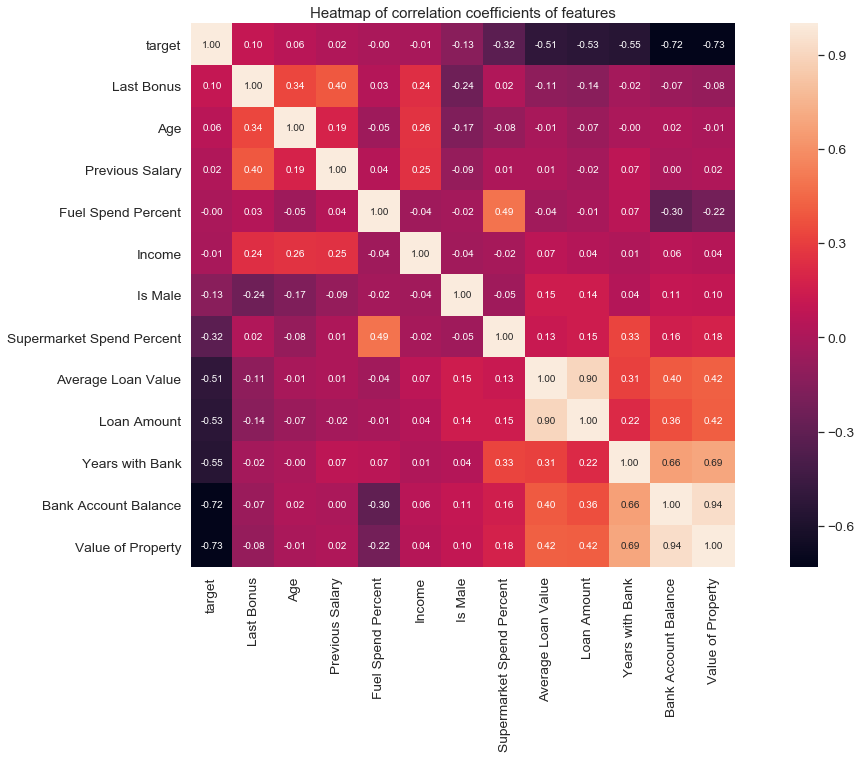

In [66]:
data_mapped_numeric = data.copy().dropna(axis=0)

data_mapped_numeric['Is Male'] = data_mapped_numeric['Gender'].map(GenderMap)
data_mapped_numeric.drop(labels='Gender',axis=1,inplace=True) #Probably unneccessary renaming of variables
data_mapped_numeric['target'] = data_mapped_numeric['target'].map(TargetMap)

corrmat = data_mapped_numeric.corr(method = 'pearson')
plt.figure(figsize=(20,10))
k = 13 #number of variables for heatmap
cols = corrmat.nlargest(k, 'target')['target'].index
cm = np.corrcoef(data_mapped_numeric[cols].values.T)
sns.set(font_scale=1.25)
plt.title("Heatmap of correlation coefficients of features")
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Looking for multicollinearity using VIF (https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/).

This quantifies the extent of correlation between one predictor and the other predictors in a model

In [67]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

display(calc_vif(data_mapped.dropna(axis=0).drop(['Is Male','target'],axis=1)))
#
# def calculate_vif_(X, thresh=5.0):
#     variables = list(range(X.shape[1]))
#     dropped = True
#     while dropped:
#         dropped = False
#         vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
#                for ix in range(X.iloc[:, variables].shape[1])]
#
#         maxloc = vif.index(max(vif))
#         if max(vif) > thresh:
#             print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
#                   '\' at index: ' + str(maxloc))
#             del variables[maxloc]
#             dropped = True
#
#     print('Remaining variables:')
#     print(X.columns[variables])
#     return X.iloc[:, variables]
# display(calculate_vif_(data_mapped.dropna(axis=0).drop(['Is Male','target'],axis=1)))

#

,variables,VIF
0,Bank Account Balance,111.730449
1,Average Loan Value,145.310714
2,Supermarket Spend Percent,68.112391
3,Fuel Spend Percent,91.319891
4,Years with Bank,7.419824
5,Loan Amount,121.699078
6,Value of Property,30.466664
7,Age,17.563149
8,Previous Salary,44.127127
9,Last Bonus,61.299097


Generally, VIF values greater than 10 indicate a high correlation.So this data is highly multicollinear - this can make feature importance metrics we use less reliable and the data bloated with unnecessary features.

## Categoric data clustering

Let's try a simple method I like to use for data clustering of categorical data - PCA.
Principle component analysis effectively reduces the data down into a series of "principle components" which each hold as much variance in the dataset as possible. in doing this, you can identify if the data is seperable in higher dimensional planes.

In [68]:
#Import PCA from the Sklearn package, a good package for all things data
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
#PCA cannot handle NAs, so let's look at just the non NA data)
data_mapped_nonas_targets = data_mapped.dropna(axis=0)['target'] #save target values
data_mapped_vals = data_mapped.drop('target',axis=1)
data_mapped_drop_nonas = data_mapped_vals.dropna(axis=0)

#fit PCA model
fit_PCA_model = pca.fit_transform(data_mapped_drop_nonas)

#show the principle components (some code copied from https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [0.994988   0.00378132]


This data has 0.99 of the explained variance in the first principle component - this implies again that the data is highly collinear.
It also allows us to visualise this data in one or two dimensions.


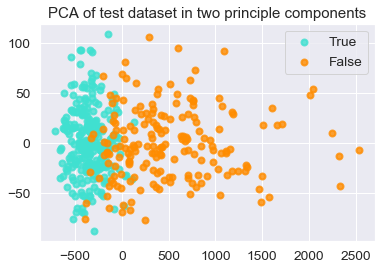

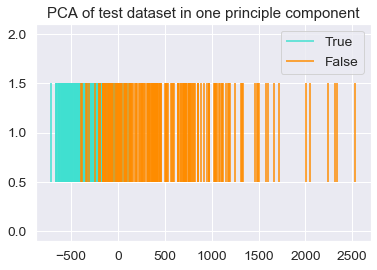

In [69]:
plt.figure()
colors = ['turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [True, False], [True,False]):
    plt.scatter(fit_PCA_model[data_mapped_nonas_targets == i, 0], fit_PCA_model[data_mapped_nonas_targets == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.title('PCA of test dataset in two principle components')
plt.legend(loc='best', shadow=False, scatterpoints=1)

#Since 99% of the variance is explained in the first principle component, testing a line with divisions.
plt.figure()
# plt.hlines(1,1,20)  # Draw a horizontal line
plt.eventplot(fit_PCA_model[data_mapped_nonas_targets == True, 0], orientation='horizontal', colors='turquoise')
plt.eventplot(fit_PCA_model[data_mapped_nonas_targets == False, 0], orientation='horizontal', colors='darkorange')
plt.legend(["True","False"])
plt.title('PCA of test dataset in one principle component')
plt.show()

We can see there is a point in the first principle component that divides this data between the True and False classes of the *target* variable.

However, there is some cross over, so while this data is largely separable in one principle component.

We can take this to mean that there is a theoretical linear hyperplane that seperates most of the data into the two classes for *target*

## Categorical Supervised Classification
we can consider this as a Categorical Supervised Classification task - with the objective of classifing if each sample (row) is either Y or N, using the known target value to train the model, and test it on unseen test data (a partitioned off section of the overall data)

Lets shuffle the data and separate it into training and test at a 70/30 split.

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_mapped_drop_nonas,data_mapped_nonas_targets,test_size= 0.3, shuffle=True)


In [71]:
# from sklearn.linear_model import LogisticRegressionCV
# clf = LogisticRegressionCV(Cs= 10,random_state=0).fit(data_mapped_drop_nonas,data_mapped_nonas_targets)
# display(clf.predict(data_mapped_drop_nonas))
# display(clf.predict_proba(data_mapped_drop_nonas))
# #model training fit
# display(clf.score(data_mapped_drop_nonas, data_mapped_nonas_targets))

### SVM

In [72]:
from sklearn import svm
svm_model = svm.LinearSVC() #using an rbf kernel
svm_model.fit(X_train, y_train)
#svm_train_preds = svm_model.predict(y_train)
display('Train Accuracy:', svm_model.score(X_train,y_train))
display('Test Accuracy:', svm_model.score(X_test,y_test))

C:\Users\matt-\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


'Train Accuracy:'

0.5857605177993528

'Test Accuracy:'

0.6842105263157895

### LightGBM (Gradient Boosting)
LightGBM is Microsoft's framework for gradient boosting. LightGBM has build in detection for categorical variables (like the boolean Is Male/Gender feature.)

In [73]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

LGBM_model = LGBMClassifier()
LGBM_model.fit(X_train, y_train)

display('Train Accuracy:', LGBM_model.score(X_train,y_train))
display('Test Accuracy:', LGBM_model.score(X_test,y_test))

'Train Accuracy:'

1.0

'Test Accuracy:'

0.9473684210526315

### Logistic Regression
Logistic regression is a good simple model of probabilities for binary events - as is the case for our Y/N target field. This was actually the model I tried first.

In the sklearn implementation of Logistic Regression, regularisation is applied by default. This lowers the risk of overfitting.

In [74]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train,y_train)
# display(clf.predict(data_mapped_drop_nonas))
# display(clf.predict_proba(data_mapped_drop_nonas))
display('Train Accuracy:',clf.score(X_train, y_train))
#Test predictions
# display(clf.predict(X_test))
# display(clf.predict_proba(y_train))
display('Test Accuracy:',clf.score(X_test, y_test))

from sklearn.metrics import confusion_matrix

print("Confusion Matrix:")
confusion_matrix(y_test, clf.predict(X_test))


C:\Users\matt-\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


'Train Accuracy:'

0.9514563106796117

'Test Accuracy:'

0.9624060150375939

Confusion Matrix


array([[59,  3],
       [ 2, 69]], dtype=int64)

We can look at the coefficients for the logistic regression to find size and direction of the relationship between a feature and the target variable

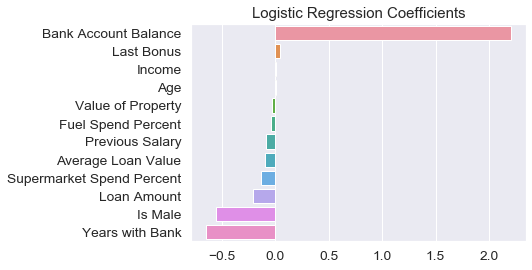

In [75]:
coeffs = pd.Series(clf.coef_[0],X_train.columns).sort_values(0,ascending=False)
sns.barplot(x=coeffs.values,y=coeffs.index)
plt.title("Logistic Regression Coefficients")
plt.show()

Looking at the coefficients here. We can determine that *Bank Account Balance* provides the most positive evidence towards the decision in where the logit regressor places the prediction for *target* Y or N.

Hence the larger the Bank Account Balance, the more likely a Y target value. On the other side, the higher the Years with Bank, the more likely a N value.
However, as mentioned earlier - we say the two had a correlation coefficient of 0.66: fairly correlated. This is where the issue of multicollinearity becomes evident.

### Table of comparison of results

|           Algorithm | Train Prediction Accuracy | Test Prediction Accuracy |
|--------------------:|---------------------------|--------------------------|
| Logistic Regression | 0.9514563106796117        | 0.9473684210526315       |
|    SVM (rbf kernel) | 0.9223300970873787        | 0.9022556390977443       |
|            LightGBM | 1.0                       | 0.9323308270676691       |

Logistic Regression has given the greatest test prediction accuracy for this dataset.

We can see that LightGBM appear to have overfit to the training data.

#Conclusion